In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [284]:
data = pd.read_csv('data/Cleaned/Cleaned_videoData.csv')
data.head(2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,...,ratings_disabled,description,cleaned_title,cleaned_title_ns,start_year,start_month,start_day,trend_year,trend_month,trend_day
0,I ASKED HER TO BE MY GIRLFRIEND...,8/11/2020,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,8/12/2020,"['brawadis', 'prank', 'basketball', 'skits', '...",1514614.0,156908.0,5855.0,...,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,I ASKED HER TO BE MY GIRLFRIEND,ASKED GIRLFRIEND,2020.0,8.0,11.0,2020.0,8.0,12.0
1,Road Rage – Why Motorcycle Riders Smash Windows,8/9/2020,UCNSMdQtn1SuFzCZjfK2C7dQ,FortNine,Autos & Vehicles,8/12/2020,"['motorcycle road rage compilation', 'motorcyc...",342870.0,30254.0,580.0,...,False,As the generation that grew up playing Road Ra...,Road Rage Why Motorcycle Riders Smash Windows,Road Rage Motorcycle Riders Smash Windows,2020.0,8.0,9.0,2020.0,8.0,12.0


In [285]:
data['comments_disabled'].value_counts()
data['ratings_disabled'].value_counts()


ratings_disabled
False    225260
True       1328
Name: count, dtype: int64

In [286]:
data.dropna(inplace = True, axis = 0)

In [287]:
# Define the mapping dictionary
mapping = {True: 1, False: 0}

# Create a new column 'NewColumn' based on 'Column1' using the mapping
data['comments_disabled_mapped'] = data['comments_disabled'].map({True: 1, False: 0})
data['ratings_disabled_mapped'] = data['ratings_disabled'].map({True: 1, False: 0})
data.head()

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,...,cleaned_title,cleaned_title_ns,start_year,start_month,start_day,trend_year,trend_month,trend_day,comments_disabled_mapped,ratings_disabled_mapped
0,I ASKED HER TO BE MY GIRLFRIEND...,8/11/2020,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,8/12/2020,"['brawadis', 'prank', 'basketball', 'skits', '...",1514614.0,156908.0,5855.0,...,I ASKED HER TO BE MY GIRLFRIEND,ASKED GIRLFRIEND,2020.0,8.0,11.0,2020.0,8.0,12.0,0,0
1,Road Rage – Why Motorcycle Riders Smash Windows,8/9/2020,UCNSMdQtn1SuFzCZjfK2C7dQ,FortNine,Autos & Vehicles,8/12/2020,"['motorcycle road rage compilation', 'motorcyc...",342870.0,30254.0,580.0,...,Road Rage Why Motorcycle Riders Smash Windows,Road Rage Motorcycle Riders Smash Windows,2020.0,8.0,9.0,2020.0,8.0,12.0,0,0
2,"Whatever You Build, I'll Pay For!",8/6/2020,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,Gaming,8/12/2020,['[none]'],13073796.0,1643982.0,16286.0,...,Whatever You Build I ll Pay For,Whatever Build Pay,2020.0,8.0,6.0,2020.0,8.0,12.0,0,0
3,"Trump signs executive orders on unemployment, ...",8/8/2020,UCHd62-u_v4DvJ8TCFtpi4GA,Washington Post,News & Politics,8/12/2020,"['debt', 'student loans', 'unemployment aid', ...",523172.0,6045.0,1076.0,...,Trump signs executive orders on unemployment e...,Trump signs executive orders unemployment evic...,2020.0,8.0,8.0,2020.0,8.0,12.0,0,0
4,UPDATE: CLAN WARS 2 ⚔️ How does it work? TV Ro...,8/8/2020,UC_F8DoJf9MZogEOU51TpTbQ,Clash Royale,Gaming,8/12/2020,"['clash royale', 'clash royale game', 'superce...",2635254.0,73921.0,2694.0,...,UPDATE CLAN WARS How does it work TV Royale Cl...,UPDATE CLAN WARS work TV Royale Clash Royale News,2020.0,8.0,8.0,2020.0,8.0,12.0,0,0


In [288]:
data.columns

Index(['title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'description',
       'cleaned_title', 'cleaned_title_ns', 'start_year', 'start_month',
       'start_day', 'trend_year', 'trend_month', 'trend_day',
       'comments_disabled_mapped', 'ratings_disabled_mapped'],
      dtype='object')

In [368]:
cols = ['view_count', 'likes', 'comment_count']

In [392]:
random.seed(123)
df = data[cols]
df.head()

,view_count,likes,comment_count
0,1514614.0,156908.0,35313.0
1,342870.0,30254.0,3124.0
2,13073796.0,1643982.0,97749.0
3,523172.0,6045.0,5109.0
4,2635254.0,73921.0,3447.0


In [393]:
sampled_data = df.sample(4000)
sampled_data.head()

,view_count,likes,comment_count
213496,928740.0,50149.0,1718.0
107603,859762.0,57047.0,2076.0
248326,566049.0,26055.0,1872.0
55796,1682331.0,175452.0,13831.0
224906,167953.0,1335.0,1108.0


In [394]:
# Normalize the data
# Calculate the minimum and maximum values for each column
min_vals = sampled_data.min()
max_vals = sampled_data.max()

# Normalize the data
n_df = (sampled_data - min_vals) / (max_vals - min_vals)
n_df.head()

,view_count,likes,comment_count
213496,0.003992,0.003187,0.000283
107603,0.003696,0.003625,0.000342
248326,0.002433,0.001656,0.000309
55796,0.007231,0.011150,0.002280
224906,0.000722,0.000085,0.000183


### Scaling

In [395]:
# Scaling data

scaler = StandardScaler()
ss_data = scaler.fit_transform(sampled_data)

# Create a new DataFrame from the standardized data
ss_df = pd.DataFrame(data=ss_data, columns=sampled_data.columns)
ss_df.head()

,view_count,likes,comment_count
0,-0.209579,-0.172948,-0.085935
1,-0.219184,-0.156006,-0.082477
2,-0.260081,-0.232125,-0.084447
3,-0.104647,0.134808,0.031045
4,-0.315513,-0.292840,-0.091826


### K MEANS - Scaled data

In [388]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(ss_df)
centroids = kmeans.cluster_centers_

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


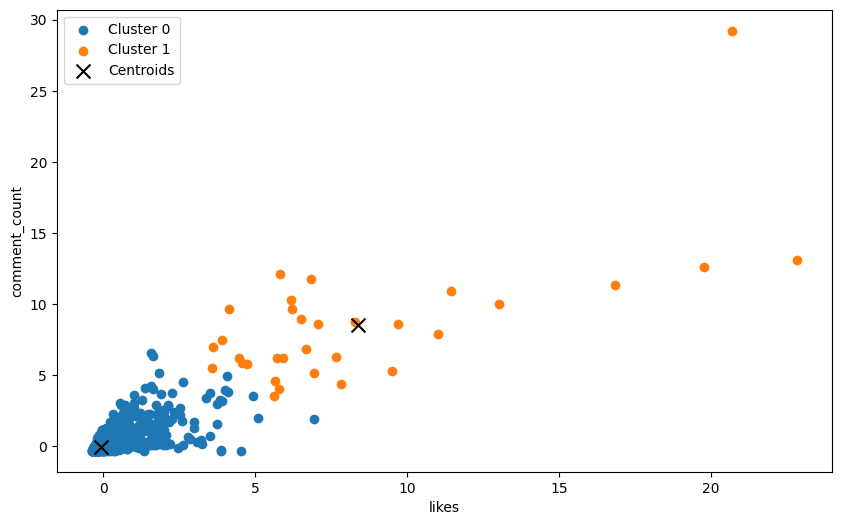

In [389]:
# Add a 'Cluster' column to your DataFrame to indicate cluster membership
ss_df['Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the data points and centroids
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in range(2):
    plt.scatter(ss_df[ss_df['Cluster'] == cluster][cols[0]],
                ss_df[ss_df['Cluster'] == cluster][cols[1]],
                label=f'Cluster {cluster}')

# Plot cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='black', label='Centroids')

# Label axes
plt.xlabel(cols[1])
plt.ylabel(cols[2])

# Add a legend
plt.legend()

# Show the plot
plt.show()

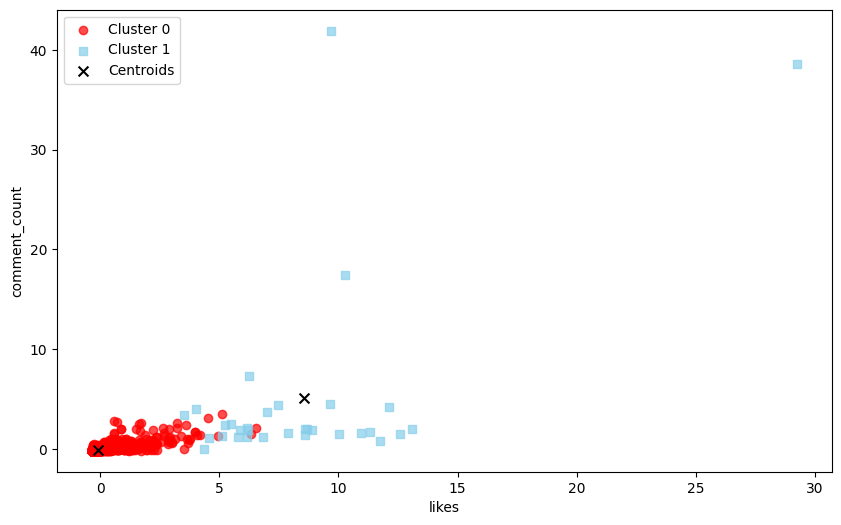

In [377]:
# Add a 'Cluster' column to your DataFrame to indicate cluster membership
ss_df['Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the data points and centroids
plt.figure(figsize=(10, 6))

# Define markers and colors for clusters
markers = ['o', 's', 'D']
colors = ['red', 'skyblue', 'green']

# Scatter plot for each cluster
for cluster in range(2):
    plt.scatter(ss_df[ss_df['Cluster'] == cluster][cols[1]],
                ss_df[ss_df['Cluster'] == cluster][cols[2]],
                label=f'Cluster {cluster}',
                marker=markers[cluster],  # Use different markers for each cluster
                color=colors[cluster],    # Use different colors for each cluster
                alpha=0.7)  # Adjust transparency

# Plot cluster centroids with smaller markers
plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=50, color='black', label='Centroids')

# Label axes
plt.xlabel(cols[1])
plt.ylabel(cols[2])

# Add a legend
plt.legend()

# Show the plot
plt.show()


D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sid\AppData\Local\Temp\ipykernel_15276\2688788673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


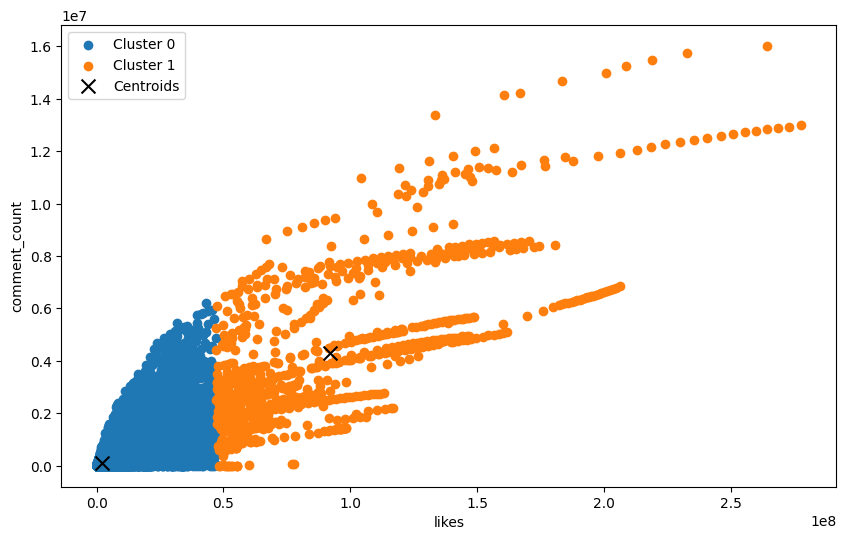

In [401]:
# Without Scaling
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
centroids = kmeans.cluster_centers_
# Add a 'Cluster' column to your DataFrame to indicate cluster membership
df['Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the data points and centroids
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in range(2):
    plt.scatter(df[df['Cluster'] == cluster][cols[0]],
                df[df['Cluster'] == cluster][cols[1]],
                label=f'Cluster {cluster}')

# Plot cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='black', label='Centroids')

# Label axes
plt.xlabel(cols[1])
plt.ylabel(cols[2])

# Add a legend
plt.legend()

# Show the plot
plt.show()

### ELBOW METHOD


In [299]:
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(sampled_data)

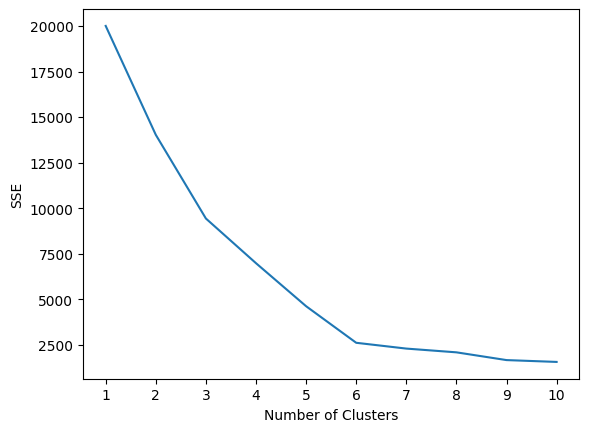

In [378]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

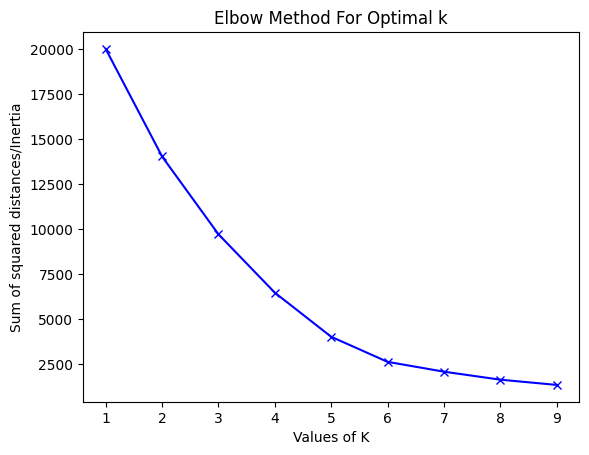

In [379]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(scaled_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

#### SILHOUETTE METHOD

In [380]:
silhouette_avg = []

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

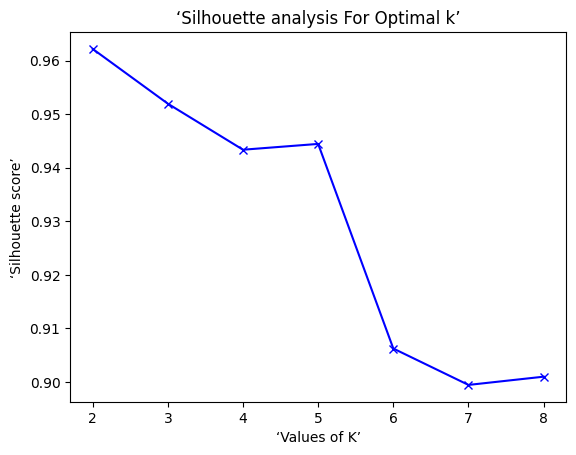

In [381]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(scaled_df, cluster_labels))


plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('‘Values of K’')
plt.ylabel('‘Silhouette score’')
plt.title('‘Silhouette analysis For Optimal k’')
plt.show()

### USING CHANNEL DESCRIPTION AS CLUSTERING COl

In [304]:

df = data[['cleaned_title_ns']].copy()
sampled_data = df[['cleaned_title_ns']].sample(frac=0.07, random_state=42)
sampled_data

,cleaned_title_ns
13291,MONSTERMAX VS TANK Demolition Ranch
103238,Dice Stacks
242896,FNAF RUIN Unused Maps Characters LOST BITS Tet...
29798,Finally Happened OT
224963,Minecraft Manhunt Combine Anything
...,...
101974,aespa Savage MV
188876,FACING BIGGEST FEAR
100855,busting insane fortnite myths
226520,Body Killed Cancer Minutes Ago


In [305]:
sampled_data.dropna(inplace = True, axis = 0)
sampled_data.shape

sampled_data = sampled_data.sample(10000)

In [306]:
df_list = sampled_data['cleaned_title_ns'].to_list()
len(df_list)

10000

In [307]:
from sklearn.feature_extraction.text import CountVectorizer   


MyCountV=CountVectorizer(
        input="content", 
        lowercase=True, 
        stop_words = "english"
        )
 
MyDTM = MyCountV.fit_transform(df_list)  # create a sparse matrix
print(type(MyDTM))

<class 'scipy.sparse._csr.csr_matrix'>


In [308]:
#vocab is a vocabulary list
vocab = MyCountV.get_feature_names_out()  # change to a list
print(list(vocab)[10:20])

['abducted', 'abduction', 'abdul', 'abiad', 'abilene', 'abilities', 'ability', 'ablaze', 'abloh', 'aboard']


In [309]:
MyDTM = MyDTM.toarray()  # convert to a regular array
print(type(MyDTM))

<class 'numpy.ndarray'>


In [310]:
ColumnNames=MyCountV.get_feature_names_out()
MyDTM_DF=pd.DataFrame(MyDTM,columns=ColumnNames)
MyDTM_DF

,aa,aaron,aau,abajo,abandoned,abba,abby,abc,abcdario,abcs,...,zone,zoo,zoom,zootiez,zootopia,zoro,zuckerberg,zunna,zuwena,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [311]:
#MyDTM_DF.to_csv('youtube_title_tokenized.csv')

## CLUSTERING TITLE DATA

In [312]:
MyDTM_DF.head()

,aa,aaron,aau,abajo,abandoned,abba,abby,abc,abcdario,abcs,...,zone,zoo,zoom,zootiez,zootopia,zoro,zuckerberg,zunna,zuwena,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [313]:
random.seed(12)

sampled_data = MyDTM_DF.sample(frac=0.5, random_state=42)


kmeans = KMeans(n_clusters=2).fit(sampled_data)
centroids = kmeans.cluster_centers_

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [314]:
sampled_data.shape

(5000, 11578)

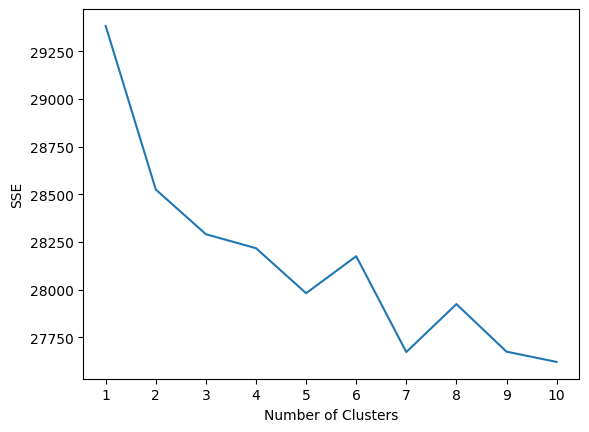

In [315]:
# ELBOW METHOD

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sampled_data)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

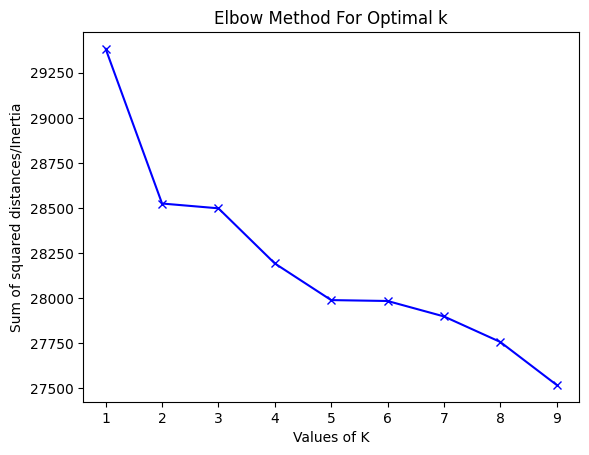

In [316]:
# Elbow method

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(sampled_data)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

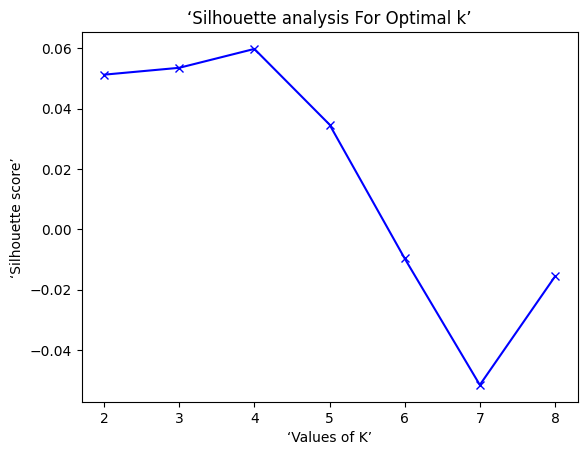

In [317]:
# SILHOUETTE METHOD

# Silhouette method
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(sampled_data)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(sampled_data, cluster_labels))


plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('‘Values of K’')
plt.ylabel('‘Silhouette score’')
plt.title('‘Silhouette analysis For Optimal k’')
plt.show()

## K MEANS

In [318]:
from sklearn.decomposition import PCA

In [323]:
kmeans = KMeans(n_clusters=4, random_state = 0).fit(sampled_data)
centroids = kmeans.cluster_centers_

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [324]:
labels = kmeans.predict(sampled_data)

In [325]:
pca = PCA(n_components = 2)
df = pca.fit_transform(sampled_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


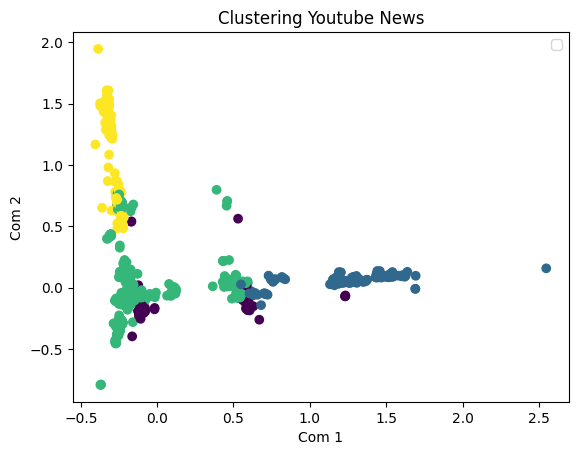

In [326]:
plt.scatter(df[:, 0], df[:, 1], c = labels)
plt.title('Clustering Youtube News')
plt.xlabel('Com 1')
plt.ylabel('Com 2')
plt.legend()
plt.show()